# Lab 07 - Data Preprocessing II

Name: Kartikeya Sharma  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2021SP  
Instructor: Brian King  

In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. [P] Create a Python function called ```process_FAA_hourly_data``` that takes a filename (with path) as a string, and returns a completely processed pandas data frame of the data, ready for analysis. It should do everything that the previous lab did to clean and prepare the file, including<br/>&emsp;&emsp;a. converting all numeric variables to their simplest numeric types<br/>&emsp;&emsp;b. converting the date/time stamp (first variable) to a pandas ```DatetimeIndex```, which becomes the actual index for the data frame.<br/>&emsp;&emsp;c. It should drop the date time variable after moving it to become the index.<br/>&emsp;&emsp;d. If you did not do this in the last lab, make sure that the ```DatetimeIndex``` is localized to a specific timezone! This is very important! What time zone? Did you notice the header? The time stamp is in GMT, so be sure to localize the index accordingly. HOW? After you set up the index, you can do:<br/><br/>```df.index = df.index.tz_localize(tz='GMT')```<br/><br/>&emsp;&emsp;NOTE: The last exercise in the previous lab had you eliminate a year from the data for the very last problem. Do NOT do that here! We'll explore that again later.

In [75]:
def _series_downcast_float_int(x):
    if (x.dtype is np.dtype(float)):
        return pd.to_numeric(x, downcast='float')
    elif ((x.dtype is np.dtype(int))): 
        return pd.to_numeric(x, downcast='integer')
    else: return x
    
def _get_station_filename(
    station_name: str,
    data_type: str,
    start_date: str,
    end_date: str,
    filename_suffix: str):
    
    station_filename = \
    data_type + "-" + \
    station_name + "_" + \
    start_date + "-" + end_date + "_" + filename_suffix
    
    return station_filename

def _get_station_filepath(
    filepath_prefix: str,
    station_name: str,
    data_type: str,
    start_date: str,
    end_date: str,
    filename_suffix: str):
    
    return filepath_prefix + \
        _get_station_filename(
            station_name=station_name,
            data_type=data_type,
            start_date=start_date,
            end_date=end_date,
            filename_suffix=filename_suffix)

def process_FAA_hourly_data(station_name: str, 
                            num_rows_skip: int=0,
                            date_time_col_index: int=0,
                            filepath_prefix: str="../data/",
                            data_type: str="faa_hourly",
                            start_date: str="20000101",
                            end_date: str="20201231",
                            filename_suffix: str="raw.csv"):
    try:
        df = pd.read_csv(
            _get_station_filepath(
                station_name=station_name,
                filepath_prefix=filepath_prefix,
                data_type=data_type,
                start_date=start_date,
                end_date=end_date,
                filename_suffix=filename_suffix), 
            skiprows=num_rows_skip)
    except:
        raise Exception("Could not read filepath " + filepath)
    
    # assuming two numeric variables will be int and float (not unsigned/signed)
    df = df.transform(_series_downcast_float_int)
    
    df.set_index(pd.DatetimeIndex(df.iloc[:,date_time_col_index]), 
                 inplace=True)
    
    df.drop(labels=df.columns[date_time_col_index],
                  axis=1,
                  inplace=True)
    
    df.index = df.index.tz_localize(tz='GMT')
        
    df.dropna(how='all',
              axis=1,
              inplace=True)
    
    return df

#### 2) 2) [P] Use your new function to read in the KIPT data file you downloaded in the last lab. Store your data frame as ```df_kipt```. Output the results of ```info()``` and ```describe()``` to confirm you read it in correctly.

In [76]:
# parameters
kipt_num_rows_skip = 25

In [77]:
df_kipt = process_FAA_hourly_data(
    station_name="KIPT", 
    num_rows_skip=kipt_num_rows_skip)

In [78]:
df_kipt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181943 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   181943 non-null  int8   
 1   Average Temp (F)               180938 non-null  float32
 2   Max Temp (F)                   180938 non-null  float32
 3   Min Temp (F)                   180938 non-null  float32
 4   Average Dewpoint Temp (F)      180816 non-null  float32
 5   1 Hour Precip (in)             30294 non-null   float32
 6   Max Wind Gust (mph)            24708 non-null   float32
 7   Average Relative Humidity (%)  177114 non-null  float32
 8   Average Wind Speed (mph)       181394 non-null  float32
 9   Average Station Pressure (mb)  181647 non-null  float32
 10  Average Wind Direction (deg)   148822 non-null  float32
 11  Max Wind Speed (mph)           181394 non-nul

In [79]:
df_kipt.describe()

Number of Observations (n/a)  Average Temp (F)   Max Temp (F)  \
count                 181943.000000     180938.000000  180938.000000   
mean                       1.336990         51.373653      51.484375   
std                        0.851021         18.850195      18.868101   
min                        0.000000        -11.900000     -11.900000   
25%                        1.000000         36.000000      36.000000   
50%                        1.000000         52.000000      52.000000   
75%                        1.000000         66.900002      66.900002   
max                       10.000000        102.000000     102.000000   

        Min Temp (F)  Average Dewpoint Temp (F)  1 Hour Precip (in)  \
count  180938.000000              180816.000000        30294.000000   
mean       51.269070                  40.277889            0.030405   
std        18.843729                  18.966587            0.078683   
min       -11.900000                 -20.900000            0.000000   
25%        36.000000                  26.100000            0.000000   
50%        51.799999                  41.000000            0.000000   
75%        66.900002                  57.000000            0.030000   
max       102.000000                  79.000000            2.350000   

       Max Wind Gust (mph)  Average Relative Humidity (%)  \
count         24708.000000                  177114.000000   
mean             22.367857                      68.680901   
std               7.489910                      19.677162   
min               0.000000                       0.000000   
25%              19.600000                      54.000000   
50%              21.900000                      71.000000   
75%              26.500000                      86.000000   
max              88.599998                     100.000000   

       Average Wind Speed (mph)  Average Station Pressure (mb)  \
count             181394.000000                  181647.000000   
mean                   5.907989                    1016.748596   
std                    5.187293                       7.636579   
min                    0.000000                     508.600006   
25%                    0.000000                    1012.200012   
50%                    5.400000                    1016.900024   
75%                    9.200000                    1021.700012   
max                   76.000000                    1044.400024   

       Average Wind Direction (deg)  Max Wind Speed (mph)  
count                 148822.000000         181394.000000  
mean                     175.469009              6.176690  
std                      119.212242              5.303467  
min                        0.000000              0.000000  
25%                       70.000000              0.000000  
50%                      210.000000              5.800000  
75%                      280.000000              9.200000  
max                      360.000000             76.000000

#### 3) [P] In the last lab, you assessed the number of missing dates in your data, under the assumption that every hour should have an observation. For now, we'll ignore the fact that there are completely missing hourly observations from the weather station. Report the number of missing values in each variable of ```df_kipt``` from the data you have.

In [80]:
# parameters
num_nan_per_col = df_kipt.isna().sum()

In [81]:
display(num_nan_per_col)

Number of Observations (n/a)          0
Average Temp (F)                   1005
Max Temp (F)                       1005
Min Temp (F)                       1005
Average Dewpoint Temp (F)          1127
1 Hour Precip (in)               151649
Max Wind Gust (mph)              157235
Average Relative Humidity (%)      4829
Average Wind Speed (mph)            549
Average Station Pressure (mb)       296
Average Wind Direction (deg)      33121
Max Wind Speed (mph)                549
dtype: int64

#### 4) [P/M] Let's pay attention to "```Average Temp (F)```". Are there hours of the day are most likely to have missing values? Report the frequency over each hour that has missing "```Average Temp (F)```" values. Be sure to report the LOCAL times according to the time zone "```US/Eastern```". Output the hours in order of the most frequently missing to least. Then, as a comment, interpret your findings. Do you see a pattern? Do missing temps tend to happen at a certain time of day?<br/><br/>(HINT: This might be challenging. First, as always, select the subset of your data matching your criteria. Then, for these data, look at the index. Date / time data types have LOTS of attributes themselves... such as hour. What do you get if you count these values?)

In [82]:
def get_df_col_null_attr_freqs(df: pd.DataFrame,
                               col_label: str,
                               timezone: str, 
                               attr_name: str,
                               is_sorted: bool=True):
    df_col = df[col_label].copy(deep=True)
    # all entries that are not defined in the column
    df_col_null = df_col[df_col.isna()]
    # count of non-defined entries in the column by hour (timezone adjusted and sorted)
    df_col_null_attr_freqs = \
    getattr(df_col_null.index.tz_convert(timezone), 
            attr_name).value_counts(sort=is_sorted)
    return df_col_null_attr_freqs
    
def get_srs_to_z_scores(srs: pd.Series,
                        srs_mean: float,
                        srs_std: float):
    srs_dev_frm_mean = srs - srs_mean
    srs_z_scores = srs_dev_frm_mean / srs_std
    return srs_z_scores
    
def print_freqs(df_freqs: pd.Series,
                col_label: str):
    print("frequency over each hour that has missing " + \
          col_label + \
          "values: ")
    display(df_freqs)
    print()
    
def print_ext_freq_stats(mean_freqs: float,
                         std_freqs: float, 
                         z_score_freqs: pd.Series):
    print("mean frequency (rounded to nearest integer):")
    print(round(mean_freqs))
    print()
    print("standard deviation of frequencies (rounded to nearest integer):")
    print(round(std_freqs))
    print()
    print("z scores of frequencies:")
    print(z_score_freqs)
    print()

In [83]:
# parameters
df_kipt_ave_tmp_col_label = "Average Temp (F)"
local_timezone_name = "US/Eastern"

In [84]:
df_kipt_ave_tmp_null_hr_freqs = \
get_df_col_null_attr_freqs(df=df_kipt,
                           col_label=df_kipt_ave_tmp_col_label, 
                           timezone=local_timezone_name, 
                           attr_name="hour",
                           is_sorted=True)

df_kipt_ave_tmp_null_hr_mean = df_kipt_ave_tmp_null_hr_freqs.mean()
df_kipt_ave_tmp_null_hr_std = df_kipt_ave_tmp_null_hr_freqs.std()

df_kipt_ave_tmp_null_hr_z_scores = \
get_srs_to_z_scores(srs=df_kipt_ave_tmp_null_hr_freqs,
                    srs_mean=df_kipt_ave_tmp_null_hr_mean,
                    srs_std=df_kipt_ave_tmp_null_hr_std)

print_freqs(df_freqs=df_kipt_ave_tmp_null_hr_freqs, 
            col_label=df_kipt_ave_tmp_col_label)

print_ext_freq_stats(mean_freqs=df_kipt_ave_tmp_null_hr_mean,
                     std_freqs=df_kipt_ave_tmp_null_hr_std,
                     z_score_freqs=df_kipt_ave_tmp_null_hr_z_scores)

frequency over each hour that has missing Average Temp (F)values: 


11    78
12    68
10    63
13    56
14    46
7     42
9     42
6     42
8     40
15    40
5     38
4     37
3     37
1     36
2     36
17    36
16    35
19    34
22    34
0     34
18    34
23    33
20    32
21    32
Name: Date/Time (GMT), dtype: int64


mean frequency (rounded to nearest integer):
42

standard deviation of frequencies (rounded to nearest integer):
12

z scores of frequencies:
11    2.974431
12    2.151059
10    1.739373
13    1.163013
14    0.339641
7     0.010292
9     0.010292
6     0.010292
8    -0.154382
15   -0.154382
5    -0.319057
4    -0.401394
3    -0.401394
1    -0.483731
2    -0.483731
17   -0.483731
16   -0.566068
19   -0.648405
22   -0.648405
0    -0.648405
18   -0.648405
23   -0.730742
20   -0.813080
21   -0.813080
Name: Date/Time (GMT), dtype: float64



In [85]:
def plot_freq_by_metric_barplot(time_values: np.ndarray,
                                freqs: np.ndarray,
                                freqs_mean: float,
                                x_label: str,
                                title: str,
                                line_label: str="data",
                                y_label: str="Frequency",
                                y_lim_bottom: int=0,
                                mean_freq_label: str="mean frequency",
                                dashes_seq: tuple=(1,3)):
    ax = sns.barplot(x=time_values, 
                     y=freqs, 
                     label=line_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_ylim(bottom=y_lim_bottom)
    
    # mean line because it's cool... and labels too!
    mean_2dline = ax.axhline(y=freqs_mean, 
                             label=mean_freq_label)
    mean_2dline.set_dashes(dashes_seq)
    ax.legend()

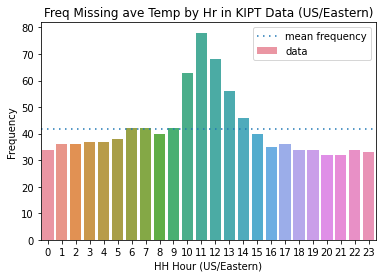

In [86]:
plot_freq_by_metric_barplot(
    time_values=df_kipt_ave_tmp_null_hr_freqs.index.values,
    freqs=df_kipt_ave_tmp_null_hr_freqs.values,
    freqs_mean=df_kipt_ave_tmp_null_hr_mean,
    x_label="HH Hour (US/Eastern)",
    title="Freq Missing ave Temp by Hr in KIPT Data (US/Eastern)",
    line_label="data",
    y_label="Frequency",
    y_lim_bottom=0,
    mean_freq_label="mean frequency",
    dashes_seq=(1,3))

The hours of 10 AM to 2 PM (late morning/early afternoon; centered around noon) had relatively high frequencies of missing average temperature (F) entries across the KIPT data set. 10 AM had a frequency of 63, 11 AM had 78, 12 PM had 68, 1 PM had 56, and 2 PM had 46; they had z scores significantly greater than 0, namely about 1.73, 2.97, 2.15, 1.16, and 0.34 (on the lower side). (Of course, I am not determining a critical z score or anything of the sort, so the z scores being "significantly greater than 0" is referenced to make more of a hand-wavvy explanation - at best - that the stated z scores are relatively significant.) Also, visually speaking, it appears that those before and after that late morning/early afternoon period are below the mean frequency of about 42 (rounded to the nearest integer); hours before that mid-day period appear to be associated with higher frequencies relative to those after that mid-day period.

#### 5. [P/M] Repeat the previous exercise, but this time, assess the same variable for the day of the week. (NOTE: Be sure to note what a 0 is. In pandas, a 0 for day of the week is a Monday! (See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html)

In [87]:
df_kipt_ave_tmp_null_day_freqs = \
get_df_col_null_attr_freqs(df=df_kipt,
                           col_label=df_kipt_ave_tmp_col_label, 
                           timezone=local_timezone_name, 
                           attr_name="dayofweek",
                           is_sorted=True)

df_kipt_ave_tmp_null_day_mean = \
df_kipt_ave_tmp_null_day_freqs.mean()
df_kipt_ave_tmp_null_day_std = \
df_kipt_ave_tmp_null_day_freqs.std()

df_kipt_ave_tmp_null_day_z_scores = \
get_srs_to_z_scores(srs=df_kipt_ave_tmp_null_day_freqs,
                    srs_mean=df_kipt_ave_tmp_null_day_mean,
                    srs_std=df_kipt_ave_tmp_null_day_std)

print_freqs(df_freqs=df_kipt_ave_tmp_null_day_freqs, 
            col_label=df_kipt_ave_tmp_col_label)

print_ext_freq_stats(
    mean_freqs=df_kipt_ave_tmp_null_day_mean,
    std_freqs=df_kipt_ave_tmp_null_day_std,
    z_score_freqs=df_kipt_ave_tmp_null_day_z_scores)

frequency over each hour that has missing Average Temp (F)values: 


1    212
2    195
0    169
3    162
6    115
4    114
5     38
Name: Date/Time (GMT), dtype: int64


mean frequency (rounded to nearest integer):
144

standard deviation of frequencies (rounded to nearest integer):
59

z scores of frequencies:
1    1.152553
2    0.866219
0    0.428297
3    0.310395
6   -0.481233
4   -0.498076
5   -1.778156
Name: Date/Time (GMT), dtype: float64



In [88]:
day_num_to_day_name = {0: "Mon",
                       1: "Tues",
                       2: "Wed",
                       3: "Thurs",
                       4: "Fri",
                       5: "Sat",
                       6: "Sun"}

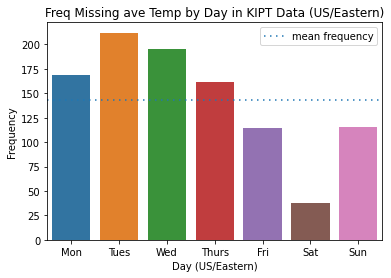

In [89]:
df_kipt_ave_tmp_null_day_name_freqs=pd.Series(
    data=df_kipt_ave_tmp_null_day_freqs.values, 
    index=df_kipt_ave_tmp_null_day_freqs.index,
    copy=True)

df_kipt_ave_tmp_null_day_name_freqs.rename(
    index=day_num_to_day_name,
    inplace=True)

df_kipt_ave_tmp_null_day_name_freqs = \
df_kipt_ave_tmp_null_day_name_freqs.reindex(
    list(day_num_to_day_name.values()))

plot_freq_by_metric_barplot(
    time_values=df_kipt_ave_tmp_null_day_name_freqs.index.values,
    freqs=df_kipt_ave_tmp_null_day_name_freqs.values,
    freqs_mean=df_kipt_ave_tmp_null_day_mean,
    x_label="Day (US/Eastern)",
    title="Freq Missing ave Temp by Day in KIPT Data (US/Eastern)",
    line_label=None,
    y_label="Frequency",
    y_lim_bottom=0,
    mean_freq_label="mean frequency",
    dashes_seq=(1,3))

The days Monday thru Thursday had relatively high frequencies of missing average temperature (F) entries across the KIPT data set, all being above the mean, which was around 144 (rounded to the nearest integer). The other days, namely Friday, Saturday, and Sunday, had frequencies below the mean. The two extrema, namely Tuesday and Saturday, which had frequencies of 212 and 38 respectively, were more than one standard deviation away from the mean; the remainder of the frequencies (of the other days of the week) were within one standard deviation away from the mean. (Once again, I am not determining a critical z score or anything of the sort, so the z scores being greater than 1, or frequencies being more than one standard deviation away from the mean, is referenced to make more of a hand-wavvy explanation - at best - that the stated z scores are relatively significant.)

#### 6) [P] Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file, but a *tab* separated file. Store the data frame as ```stations```. Show ```stations.info()``` after you read in the data.

In [90]:
# parameters
faa_pa_stations_filepath = "../data/FAA_PA_stations.csv"
num_rows_skip = 0

In [91]:
def process_FAA_station_list_data(filepath: str, 
                              delimiter: str='\t',
                              num_rows_skip: int=0):
    
    try:
        df = pd.read_csv(filepath, 
                         delimiter=delimiter,
                         skiprows=num_rows_skip)
    except:
        raise Exception("Could not read filepath " + filepath)
    
    return df

In [92]:
stations = process_FAA_station_list_data(
    filepath=faa_pa_stations_filepath,
    num_rows_skip=num_rows_skip,
    delimiter='\t')

stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                46 non-null     object 
 1   Name              46 non-null     object 
 2   County            45 non-null     object 
 3   State             46 non-null     object 
 4   Lat               46 non-null     float64
 5   Lon               46 non-null     float64
 6   Elevation (feet)  46 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


#### 7) [P] As usual, you must always assess your missing data, if any. Are there any observations (rows) in ```stations``` that have missing data? Output them, then eliminate them from your data. Be sure to ```reset_index(drop=True)``` to reset the index in case any observations are dropped. Output ```stations.info()``` again.

In [93]:
stations_missing = stations[stations.isna().any(axis=1)]

display(stations_missing)

ID            Name County State     Lat     Lon  Elevation (feet)
24  KUKT  QUAKERTOWN ARP    NaN    PA  40.435 -75.381             524.9

In [94]:
stations.drop(axis=0, 
              index=stations_missing.index,
              inplace=True)

In [95]:
stations.reset_index(drop=True)

ID                 Name        County State     Lat     Lon  \
0   KABE            ALLENTOWN        LEHIGH    PA  40.650 -75.440   
1   KAOO              ALTOONA         BLAIR    PA  40.290 -78.320   
2   KBVI         BEAVER FALLS        BEAVER    PA  40.770 -80.390   
3   KBFD             BRADFORD        MCKEAN    PA  41.800 -78.640   
4   KBTP               BUTLER        BUTLER    PA  40.770 -79.950   
5   KCXY         CAPITAL CITY          YORK    PA  40.220 -76.850   
6   KFIG           CLEARFIELD    CLEARFIELD    PA  41.040 -78.410   
7   KDYL           DOYLESTOWN         BUCKS    PA  40.330 -75.120   
8   KDUJ               DUBOIS     JEFFERSON    PA  41.180 -78.900   
9   KERI                 ERIE          ERIE    PA  42.080 -80.170   
10  KFKL             FRANKLIN       VENANGO    PA  41.370 -79.860   
11  KIDI              INDIANA       INDIANA    PA  40.630 -79.100   
12  KJST            JOHNSTOWN       CAMBRIA    PA  40.320 -78.830   
13  KLNS            LANCASTER     LANCASTER    PA  40.120 -76.290   
14  KLBE              LATROBE  WESTMORELAND    PA  40.283 -79.400   
15  KGKJ            MEADVILLE      CRAWFORD    PA  41.620 -80.210   
16  KMDT           MIDDLETOWN       DAUPHIN    PA  40.190 -76.760   
17  KMPO         MOUNT POCONO        MONROE    PA  41.140 -75.370   
18  KMUI  MUIR ARMY AIR FIELD       LEBANON    PA  40.430 -76.570   
19  KPHL         PHILADELPHIA  PHILADELPHIA    PA  39.870 -75.240   
20  KPNE      PHILADELPHIA NE  PHILADELPHIA    PA  40.080 -75.020   
21  KPIT           PITTSBURGH     ALLEGHENY    PA  40.500 -80.230   
22  KAGC       PITTSBURGH AGC     ALLEGHENY    PA  40.355 -79.922   
23  KPTW            POTTSTOWN    MONTGOMERY    PA  40.240 -75.550   
24  KRDG              READING         BERKS    PA  40.370 -75.960   
25  KAVP             SCRANTON       LUZERNE    PA  41.330 -75.720   
26  KSEG          SELINSGROVE        SNYDER    PA  40.820 -76.860   
27  KUNV      UNIVERSITY PARK        CENTRE    PA  40.850 -77.850   
28  KAFJ           WASHINGTON    WASHINGTON    PA  40.130 -80.290   
29  KIPT         WILLIAMSPORT      LYCOMING    PA  41.240 -76.920   
30  KLOM      WINGS FIELD APT    MONTGOMERY    PA  40.140 -75.270   
31  KTHV                 YORK          YORK    PA  39.920 -76.870   
32  K12N              ANDOVER        SUSSEX    NJ  40.020 -74.730   
33  KACY        ATLANTIC CITY      ATLANTIC    NJ  39.450 -74.570   
34  KBLM               BELMAR      MONMOUTH    NJ  40.180 -74.130   
35  KCDW             CALDWELL         ESSEX    NJ  40.880 -74.280   
36  KNEL            LAKEHURST         OCEAN    NJ  40.030 -74.350   
37  KWRI         MCGUIRE BASE    BURLINGTON    NJ  40.020 -74.600   
38  KMIV            MILLVILLE    CUMBERLAND    NJ  39.370 -75.080   
39  KVAY          MOUNT HOLLY    BURLINGTON    NJ  39.950 -74.850   
40  KEWR               NEWARK         ESSEX    NJ  40.720 -74.170   
41  KSMQ           SOMERVILLE      SOMERSET    NJ  40.620 -74.670   
42  KFWN               SUSSEX        SUSSEX    NJ  41.200 -74.620   
43  KTEB            TETERBORO        BERGEN    NJ  40.850 -74.070   
44  KTTN              TRENTON        MERCER    NJ  40.280 -74.820   

    Elevation (feet)  
0              376.0  
1             1504.0  
2             1230.0  
3             2142.0  
4             1250.0  
5              340.0  
6             1516.0  
7              394.0  
8             1814.0  
9              730.0  
10            1540.0  
11            1400.0  
12            2280.0  
13             403.0  
14            1190.0  
15            1400.0  
16             312.0  
17            1895.0  
18             489.0  
19              27.0  
20             100.0  
21            1150.0  
22            1248.0  
23             311.0  
24             360.0  
25             956.0  
26             444.0  
27            1240.0  
28            1210.0  
29             520.0  
30             302.0  
31             486.0  
32             583.0  
33              60.0  
34             159.0  
35 

In [96]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                45 non-null     object 
 1   Name              45 non-null     object 
 2   County            45 non-null     object 
 3   State             45 non-null     object 
 4   Lat               45 non-null     float64
 5   Lon               45 non-null     float64
 6   Elevation (feet)  45 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


#### 8) [P] Examine the data frame of ```stations``` by showing the first few observations using ```stations.head(10)``` In particular, pay close attention to the variables ```Lat``` and ```Lon```. These represent the precise latitude and longitude geolocation for the weather station.

In [97]:
stations.head(10)

ID          Name      County State    Lat    Lon  Elevation (feet)
0  KABE     ALLENTOWN      LEHIGH    PA  40.65 -75.44             376.0
1  KAOO       ALTOONA       BLAIR    PA  40.29 -78.32            1504.0
2  KBVI  BEAVER FALLS      BEAVER    PA  40.77 -80.39            1230.0
3  KBFD      BRADFORD      MCKEAN    PA  41.80 -78.64            2142.0
4  KBTP        BUTLER      BUTLER    PA  40.77 -79.95            1250.0
5  KCXY  CAPITAL CITY        YORK    PA  40.22 -76.85             340.0
6  KFIG    CLEARFIELD  CLEARFIELD    PA  41.04 -78.41            1516.0
7  KDYL    DOYLESTOWN       BUCKS    PA  40.33 -75.12             394.0
8  KDUJ        DUBOIS   JEFFERSON    PA  41.18 -78.90            1814.0
9  KERI          ERIE        ERIE    PA  42.08 -80.17             730.0

#### 9) Create a new variable in ```stations``` called "```distKIPT```" that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations.

In [98]:
# parameters 
euclid_dist_to_kipt_col_name = "distKIPT"
lat_col_name = 'Lat'
lon_col_name = 'Lon'
station_name_col_name = "ID"
to_station_name = "KIPT"

In [99]:
def add_euclid_dist_from_stations_to_station(
    stations: pd.DataFrame,
    lat_col_name: str,
    lon_col_name: str,
    euclid_dist_to_station_col_name: str,
    station_name_col_name: str,
    to_station_name: str):
    
    is_kipt = stations[station_name_col_name]==to_station_name
    
    dist_lat = (stations.loc[:,lat_col_name] - \
    stations[is_kipt][lat_col_name].values)
    
    print(stations.loc[:,lat_col_name])
    print(stations.loc[is_kipt, lat_col_name])
    
    dist_lon = stations.loc[:,lon_col_name] - \
    stations[is_kipt][lon_col_name].values
    
    stations[euclid_dist_to_station_col_name] = \
    (dist_lat**2 + dist_lon**2)**0.5
                  

In [100]:
add_euclid_dist_from_stations_to_station(
    stations=stations, 
    lat_col_name=lat_col_name, 
    lon_col_name=lon_col_name, 
    euclid_dist_to_station_col_name=euclid_dist_to_kipt_col_name,
    station_name_col_name=station_name_col_name,
    to_station_name=to_station_name)

stations_by_distKIPT = stations.sort_values(
    by=["distKIPT"], 
    ascending=True,
    inplace=False)

0     40.650
1     40.290
2     40.770
3     41.800
4     40.770
5     40.220
6     41.040
7     40.330
8     41.180
9     42.080
10    41.370
11    40.630
12    40.320
13    40.120
14    40.283
15    41.620
16    40.190
17    41.140
18    40.430
19    39.870
20    40.080
21    40.500
22    40.355
23    40.240
25    40.370
26    41.330
27    40.820
28    40.850
29    40.130
30    41.240
31    40.140
32    39.920
33    40.020
34    39.450
35    40.180
36    40.880
37    40.030
38    40.020
39    39.370
40    39.950
41    40.720
42    40.620
43    41.200
44    40.850
45    40.280
Name: Lat, dtype: float64
30    41.24
Name: Lat, dtype: float64


#### 10) [P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [101]:
stations_by_distKIPT.head(10)

ID                 Name     County State    Lat    Lon  \
30  KIPT         WILLIAMSPORT   LYCOMING    PA  41.24 -76.92   
27  KSEG          SELINSGROVE     SNYDER    PA  40.82 -76.86   
18  KMUI  MUIR ARMY AIR FIELD    LEBANON    PA  40.43 -76.57   
28  KUNV      UNIVERSITY PARK     CENTRE    PA  40.85 -77.85   
5   KCXY         CAPITAL CITY       YORK    PA  40.22 -76.85   
16  KMDT           MIDDLETOWN    DAUPHIN    PA  40.19 -76.76   
26  KAVP             SCRANTON    LUZERNE    PA  41.33 -75.72   
13  KLNS            LANCASTER  LANCASTER    PA  40.12 -76.29   
25  KRDG              READING      BERKS    PA  40.37 -75.96   
32  KTHV                 YORK       YORK    PA  39.92 -76.87   

    Elevation (feet)  distKIPT  
30             520.0  0.000000  
27             444.0  0.424264  
18             489.0  0.882383  
28            1240.0  1.008464  
5              340.0  1.022399  
16             312.0  1.062121  
26             956.0  1.203370  
13             403.0  1.285029  
25             360.0  1.295569  
32             486.0  1.320947

#### 11) [P] Using your results, go back to the PSU climate website (http://climate.met.psu.edu/data/ida/) and download the *faa_hourly* data for the THREE closest stations that have hourly data available in the same date range as the data you downloaded from KIPT (i.e. 2000-01-01 à 2020-12-31). (HINT: You may need to skip a station because it does not have data available in this range.) Copy the data into your data folder. Then, read in each data file into its own data frame using your function. You should have four data frames: ```df_kipt```, and three other data frames representing the three closest stations. Show the result of ```info()``` on your three new data frames.<br/><br/>(HINT: KSEG, KUNV, KCXY)

In [102]:
# filename parameters for KSEG, KUNV, KCXY
# setup <data_type>-<other_station_name>_
# <start_date>-<end_date>_<suffix>
data_type = "faa_hourly"
start_date = "20000101"
end_date = "20201231"
suffix = "raw.csv"

In [103]:
# other parameters
other_num_rows_skip = 16

In [104]:
df_kseg = process_FAA_hourly_data(
    station_name="KSEG", 
    num_rows_skip=other_num_rows_skip)
df_kunv = process_FAA_hourly_data(
    station_name="KUNV", 
    num_rows_skip=other_num_rows_skip)
df_kcxy = process_FAA_hourly_data(
    station_name="KCXY", 
    num_rows_skip=other_num_rows_skip)

In [105]:
df_kseg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180858 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   180858 non-null  int8   
 1   Average Temp (F)               180242 non-null  float32
 2   Max Temp (F)                   180242 non-null  float32
 3   Min Temp (F)                   180242 non-null  float32
 4   Average Dewpoint Temp (F)      180049 non-null  float32
 5   1 Hour Precip (in)             27623 non-null   float32
 6   Max Wind Gust (mph)            19268 non-null   float32
 7   Average Relative Humidity (%)  176224 non-null  float32
 8   Average Wind Speed (mph)       180029 non-null  float32
 9   Average Station Pressure (mb)  180610 non-null  float32
 10  Average Wind Direction (deg)   131220 non-null  float32
 11  Max Wind Speed (mph)           180029 non-nul

In [106]:
df_kunv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177251 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   177251 non-null  int8   
 1   Average Temp (F)               175777 non-null  float32
 2   Max Temp (F)                   175777 non-null  float32
 3   Min Temp (F)                   175777 non-null  float32
 4   Average Dewpoint Temp (F)      175766 non-null  float32
 5   1 Hour Precip (in)             7731 non-null    float32
 6   Max Wind Gust (mph)            33669 non-null   float32
 7   Average Relative Humidity (%)  170826 non-null  float32
 8   Average Wind Speed (mph)       176919 non-null  float32
 9   Average Station Pressure (mb)  175686 non-null  float32
 10  Average Wind Direction (deg)   160305 non-null  float32
 11  Max Wind Speed (mph)           176919 non-nul

In [107]:
df_kcxy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135921 entries, 2000-01-01 00:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   135921 non-null  int8   
 1   Average Temp (F)               135445 non-null  float32
 2   Max Temp (F)                   135445 non-null  float32
 3   Min Temp (F)                   135445 non-null  float32
 4   Average Dewpoint Temp (F)      135298 non-null  float32
 5   1 Hour Precip (in)             18708 non-null   float32
 6   Max Wind Gust (mph)            15967 non-null   float32
 7   Average Relative Humidity (%)  131757 non-null  float32
 8   Average Wind Speed (mph)       135712 non-null  float32
 9   Average Station Pressure (mb)  135246 non-null  float32
 10  Average Wind Direction (deg)   123585 non-null  float32
 11  Max Wind Speed (mph)           135712 non-nul

#### 12) [P] Create a new data frame called ```df_ave_temps``` that contains the average temperature from all four stations. Name the variables with the four-letter station identifier (e.g. "```KIPT```"). The index should have a COMPLETE hourly date range from the start date "```20000101 00:00:00 GMT```" to finish date "```20201231 23:00:00 GMT```". The results should be a complete dataset with an observation for every hour. If hourly observations are missing from the station you are copying from, then a NaN value should be stored for that entry. You will use these data for the remainder of this exercise.<br/><br/>Show ```df_ave_temps.info()```<br/><br/>(NOTE – Depending on how you do this, it might take a bit of processing time. Be patient.)

# didn't -- in lab 6 -- you say to NOT insert every hour because we don't want to assume that our data is complete

In [108]:
# parameters
hourly_date_range = pd.date_range(
    start="January 1 2000 12am", 
    end="December 31, 2020 11pm", 
    freq="H",
    tz='GMT')

In [109]:
df_ave_temps = pd.DataFrame(
    {"KIPT": df_kipt[df_kipt_ave_tmp_col_label], 
     "KSEG": df_kseg[df_kipt_ave_tmp_col_label],
     "KUNV": df_kunv[df_kipt_ave_tmp_col_label], 
     "KCXY": df_kcxy[df_kipt_ave_tmp_col_label]},
    index=pd.Index(hourly_date_range))

In [110]:
df_ave_temps.count()

KIPT    180938
KSEG    180242
KUNV    175777
KCXY    135445
dtype: int64

In [111]:
df_ave_temps.head(20) # just to see

KIPT       KSEG       KUNV       KCXY
2000-01-01 00:00:00+00:00  26.100000  27.000000  21.200001  28.000000
2000-01-01 01:00:00+00:00  26.100000  27.000000  21.200001  27.000000
2000-01-01 02:00:00+00:00  26.100000  27.000000  21.200001  26.100000
2000-01-01 03:00:00+00:00  26.100000  26.100000  21.200001  26.100000
2000-01-01 04:00:00+00:00  26.100000  26.100000  21.200001  25.000000
2000-01-01 05:00:00+00:00  25.000000  21.900000  39.200001        NaN
2000-01-01 06:00:00+00:00  23.000000  21.549999        NaN        NaN
2000-01-01 07:00:00+00:00  23.000000  21.100000        NaN        NaN
2000-01-01 08:00:00+00:00  21.900000  21.549999        NaN        NaN
2000-01-01 09:00:00+00:00  21.900000  21.900000  24.799999        NaN
2000-01-01 10:00:00+00:00  19.900000  21.799999  24.799999        NaN
2000-01-01 11:00:00+00:00  21.000000  21.900000  24.799999        NaN
2000-01-01 12:00:00+00:00  19.900000  23.000000  21.200001  24.799999
2000-01-01 13:00:00+00:00  23.000000  24.100000  28.400000  24.799999
2000-01-01 14:00:00+00:00  27.000000  25.900000  32.000000  26.600000
2000-01-01 15:00:00+00:00  30.900000  30.900000  39.200001  28.400000
2000-01-01 16:00:00+00:00  35.099998  36.000000  46.400002  32.000000
2000-01-01 17:00:00+00:00  37.000000  44.099998  48.200001  33.799999
2000-01-01 18:00:00+00:00  42.099998  48.000000  51.799999  39.200001
2000-01-01 19:00:00+00:00  43.000000  51.099998  51.799999  46.400002

#### 13) [P] Each station has missing observations for average temperature. Report the number of missing average temperature readings in ```df_ave_temps``` for each location.

In [112]:
df_ave_temps.isnull().sum(axis=0)

KIPT     3166
KSEG     3862
KUNV     8327
KCXY    48659
dtype: int64

#### 14) [P] Now, let's get to why we are considering these alternative stations. Report the number of missing data in KIPT that have at least one alternative station with an existing value. You should output a statement like, "```There are XXXX out of XXXX missing KIPT temps that can be restored from other locations.```"<br/><br/>Also, show the first 10 observations of these data that meet this criteria using ```head(10)```. Your output should look something like...<br/><br/>&emsp;&emsp;*output below matches the one given in the lab*

# can the code just be self-documenting

# and isn't it just general not just KIPT anymore (even though objective of this project is technically to estimate the KIPT temp... we're technically just doing it broadly across all of the locations... I guess... but maybe not because all of the locations have different other locations around them?)

In [113]:
# parameters
other_station_names = ["KSEG", "KUNV", "KCXY"]

In [114]:
srs_ave_temps_kipt = df_ave_temps["KIPT"].copy(deep=True)

srs_ave_temps_kipt_nan = \
srs_ave_temps_kipt[srs_ave_temps_kipt.isnull()].copy(deep=True)

num_kipt_nan = len(srs_ave_temps_kipt_nan)

df_ave_temps_stations_if_kipt_nan = \
df_ave_temps.loc[srs_ave_temps_kipt_nan.index].copy(deep=True)

df_restorable_kipt_temps = \
df_ave_temps_stations_if_kipt_nan[
    df_ave_temps_stations_if_kipt_nan.notna().any(axis=1)
].copy(deep=True)

num_restorable_kipt_nan = len(df_restorable_kipt_temps)

In [115]:
print("There are " + str(num_restorable_kipt_nan) + \
      " out of " + str(num_kipt_nan) + \
      " missing KIPT temps that can be restored from other locations.")

There are 1924 out of 3166 missing KIPT temps that can be restored from other locations.


In [116]:
df_restorable_kipt_temps.head(10)

KIPT       KSEG       KUNV       KCXY
2000-01-03 18:00:00+00:00   NaN  53.099998  57.200001        NaN
2000-01-05 17:00:00+00:00   NaN  35.099998  32.000000        NaN
2000-01-06 20:00:00+00:00   NaN  41.000000  39.200001        NaN
2000-01-07 14:00:00+00:00   NaN  36.000000  35.599998  35.599998
2000-01-10 02:00:00+00:00   NaN  39.000000  37.400002        NaN
2000-01-10 03:00:00+00:00   NaN  39.000000  35.599998        NaN
2000-01-10 04:00:00+00:00   NaN  36.000000        NaN        NaN
2000-01-10 05:00:00+00:00   NaN  32.000000        NaN        NaN
2000-01-10 06:00:00+00:00   NaN  34.000000        NaN        NaN
2000-01-10 07:00:00+00:00   NaN  35.349998        NaN        NaN

#### 15) [P] Remember that exercise in the previous lab that gathered the number of missing data by year? Display a barchart showing the number of missing data in KIPT by year that CANNOT be restored from any of the other stations. Annotate the chart with the year that is standing out as the least likely to be successfully restored.<br/><br/>Your chart should looks something like this:<br/><br/>&emsp;&emsp;*output below matches the one given in the assignment*

In [117]:
df_non_restorable_kipt_temps = \
df_ave_temps_stations_if_kipt_nan[
    df_ave_temps_stations_if_kipt_nan.isna().all(axis=1)
]["KIPT"].copy(deep=True)

srs_non_restorable_kipt_temps_yearly_count = \
df_non_restorable_kipt_temps.isna().resample('Y').count()

srs_non_restorable_kipt_temps_yearly_count

2000-12-31 00:00:00+00:00    739
2001-12-31 00:00:00+00:00     13
2002-12-31 00:00:00+00:00      4
2003-12-31 00:00:00+00:00     15
2004-12-31 00:00:00+00:00      7
2005-12-31 00:00:00+00:00      7
2006-12-31 00:00:00+00:00      6
2007-12-31 00:00:00+00:00     34
2008-12-31 00:00:00+00:00    109
2009-12-31 00:00:00+00:00     24
2010-12-31 00:00:00+00:00     10
2011-12-31 00:00:00+00:00     13
2012-12-31 00:00:00+00:00     41
2013-12-31 00:00:00+00:00     28
2014-12-31 00:00:00+00:00     11
2015-12-31 00:00:00+00:00     27
2016-12-31 00:00:00+00:00      8
2017-12-31 00:00:00+00:00     61
2018-12-31 00:00:00+00:00     44
2019-12-31 00:00:00+00:00     19
2020-12-31 00:00:00+00:00     22
Freq: A-DEC, Name: KIPT, dtype: int64

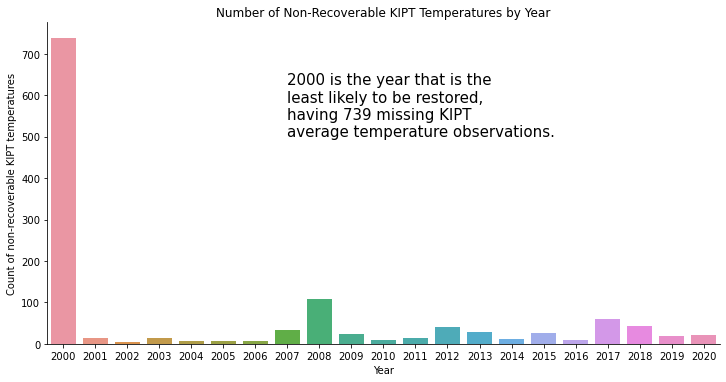

In [118]:
fg = sns.catplot(
    kind='bar',
    data=srs_non_restorable_kipt_temps_yearly_count,
    x=srs_non_restorable_kipt_temps_yearly_count.index.year.values, 
    y=srs_non_restorable_kipt_temps_yearly_count,
    aspect=2
)
# source: https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
# fg.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fg.ax.set_xlabel("Year")
fg.ax.set_ylabel("Count of non-recoverable KIPT temperatures")
fg.ax.set_title("Number of Non-Recoverable KIPT Temperatures by Year");
max_yr = srs_non_restorable_kipt_temps_yearly_count.idxmax().year
max_num_obs = srs_non_restorable_kipt_temps_yearly_count.max()
fg.ax.annotate(
    text=str(max_yr) + " is the year that is the\nleast " + \
    "likely to be restored,\nhaving " + \
    str(max_num_obs) + \
    " missing KIPT\naverage temperature observations.",
    xy=(7,500),
    fontsize=15);

#### 16) [P] It still looks like one year in particular is pretty bad. Confirm this visually by creating a line plot that plots all four stations for that one year, with each station a different color. Make sure KIPT stands out in some way. Only show the data for the one year you answered in the previous exercise. Interpret your results. In particular, do you see any other problems from any stations? Label your plot (e.g. title, axis, legend)

In [119]:
# parameters
station_names = ["KIPT", "KSEG", "KUNV", "KCXY"]
station_name_col_name = "location"
ave_tmp_col_name = df_kipt_ave_tmp_col_label
plot_title = "Hourly Temperatures in 2000 By Station"

In [120]:
max_year = \
srs_non_restorable_kipt_temps_yearly_count.idxmax().year

is_max_year = df_ave_temps.index.year == max_year
df_ave_temps_is_max_year = df_ave_temps[is_max_year].copy(deep=True)

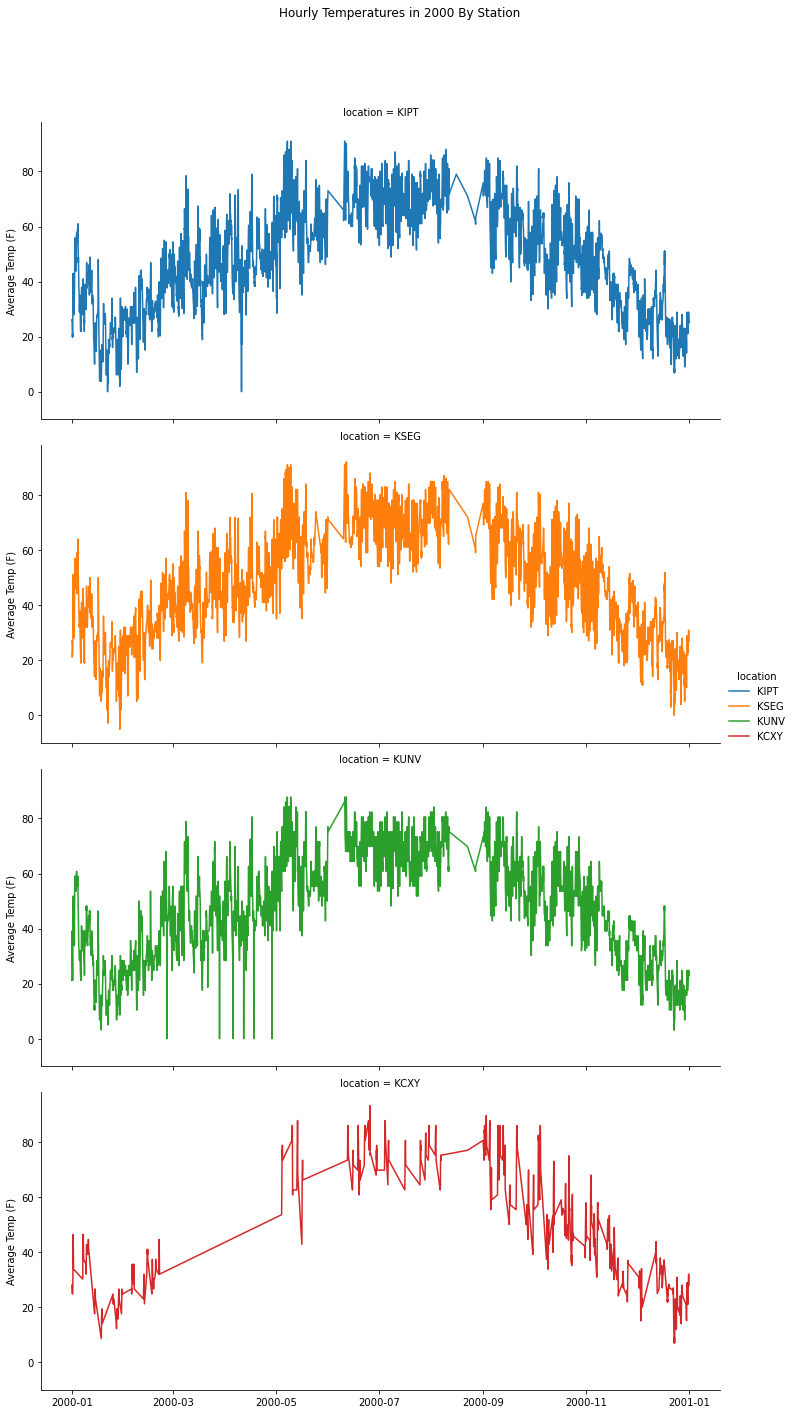

In [121]:
df_ave_temps_is_max_year_mlted = df_ave_temps_is_max_year.melt(
    value_vars=station_names,
    var_name=station_name_col_name,
    value_name=ave_tmp_col_name,
    ignore_index=False
)

fg = sns.relplot(
    kind="line",
    data=df_ave_temps_is_max_year_mlted,
    x=df_ave_temps_is_max_year_mlted.index,
    y=ave_tmp_col_name,
    hue=station_name_col_name,
    row=station_name_col_name,
    aspect=2
)

fg.fig.suptitle(plot_title)
fg.fig.subplots_adjust(top=0.9) # scale down top of graph to 
                                # allow plot title to fit

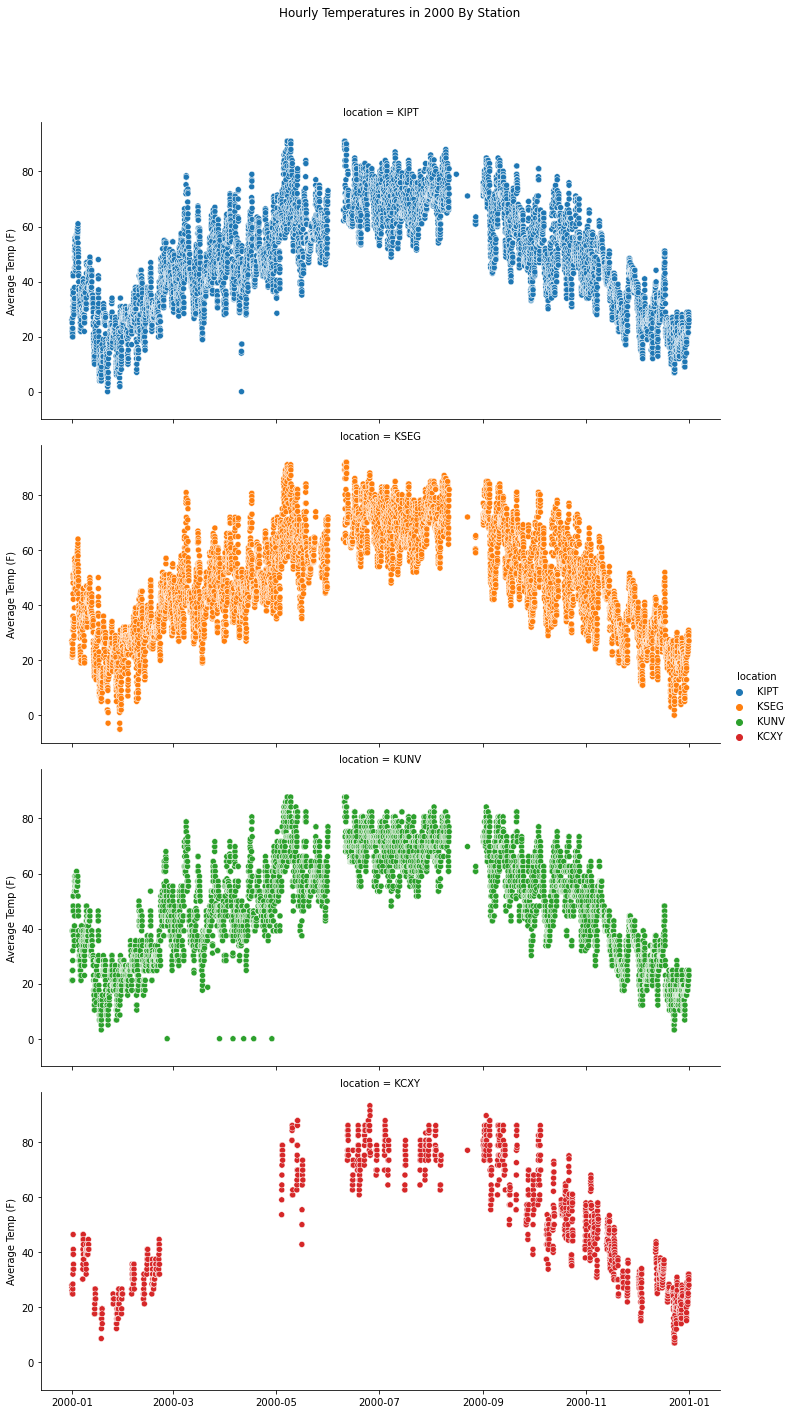

In [122]:
fg = sns.relplot(
    kind="scatter",
    data=df_ave_temps_is_max_year_mlted,
    x=df_ave_temps_is_max_year_mlted.index,
    y=ave_tmp_col_name,
    hue=station_name_col_name,
    row=station_name_col_name,
    aspect=2
)

fg.fig.suptitle(plot_title)
fg.fig.subplots_adjust(top=0.9) # scale down top of graph to 
                                # allow plot title to fit

#### 17. [P] Looking at your plot of the year 2000 over all stations should reveal that KUNV is problematic at 6 different times. Report these observations, but report them from your full KUNV dataframe. Show only those observations.

In [123]:
is_max_year_kunv = df_kunv.index.year == max_year
df_kunv[is_max_year_kunv].nsmallest(6, columns=ave_tmp_col_name)

Number of Observations (n/a)  Average Temp (F)  \
Date/Time (GMT)                                                             
2000-02-26 13:00:00+00:00                             1               0.0   
2000-03-28 14:00:00+00:00                             1               0.0   
2000-04-05 14:00:00+00:00                             1               0.0   
2000-04-11 22:00:00+00:00                             1               0.0   
2000-04-17 21:00:00+00:00                             1               0.0   
2000-04-28 15:00:00+00:00                             1               0.0   

                           Max Temp (F)  Min Temp (F)  \
Date/Time (GMT)                                         
2000-02-26 13:00:00+00:00           0.0           0.0   
2000-03-28 14:00:00+00:00           0.0           0.0   
2000-04-05 14:00:00+00:00           0.0           0.0   
2000-04-11 22:00:00+00:00           0.0           0.0   
2000-04-17 21:00:00+00:00           0.0           0.0   
2000-04-28 15:00:00+00:00           0.0           0.0   

                           Average Dewpoint Temp (F)  1 Hour Precip (in)  \
Date/Time (GMT)                                                            
2000-02-26 13:00:00+00:00                   0.000000                 0.0   
2000-03-28 14:00:00+00:00                  26.600000                 0.0   
2000-04-05 14:00:00+00:00                   0.000000                 0.0   
2000-04-11 22:00:00+00:00                   0.000000                 0.0   
2000-04-17 21:00:00+00:00                   0.000000                 0.0   
2000-04-28 15:00:00+00:00                  35.599998                 0.0   

                           Max Wind Gust (mph)  Average Relative Humidity (%)  \
Date/Time (GMT)                                                                 
2000-02-26 13:00:00+00:00             0.000000                            0.0   
2000-03-28 14:00:00+00:00            20.799999                            0.0   
2000-04-05 14:00:00+00:00            26.299999                            0.0   
2000-04-11 22:00:00+00:00             0.000000                            0.0   
2000-04-17 21:00:00+00:00             0.000000                            0.0   
2000-04-28 15:00:00+00:00             0.000000                            0.0   

                           Average Wind Speed (mph)  \
Date/Time (GMT)                                       
2000-02-26 13:00:00+00:00                  8.100000   
2000-03-28 14:00:00+00:00                 13.900000   
2000-04-05 14:00:00+00:00                 20.799999   
2000-04-11 22:00:00+00:00                  5.800000   
2000-04-17 21:00:00+00:00                  8.100000   
2000-04-28 15:00:00+00:00                  9.200000   

                           Average Station Pressure (mb)  \
Date/Time (GMT)                                            
2000-02-26 13:00:00+00:00                       0.000000   
2000-03-28 14:00:00+00:00                     990.900024   
2000-04-05 14:00:00+00:00                       0.000000   
2000-04-11 22:00:00+00:00                       0.000000   
2000-04-17 21:00:00+00:00                       0.000000   
2000-04-28 15:00:00+00:00                    1013.900024   

                           Average Wind Direction (deg)  Max Wind Speed (mph)  
Date/Time (GMT)                                                                
2000-02-26 13:00:00+00:00                           NaN              8.100000  
2000-03-28 14:00:00+00:00                           NaN             13.900000  
2000-04-05 14:00:00+00:00                           NaN             20.799999  
2000-04-11 22:00:00+00:00                           NaN              5.800000  
2000-04-17 21:00:00+00:00                           NaN              8.100000  
2000-04-28 15:00:00+00:00                           NaN              9.200000

#### 18) [M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into NaN is not an acceptable solution. 0.0 may very well be a real value!

Algorithmically, there several ways to go about detecting these problems, which include looking at data points with the most spread (from the mean), without many points near them (analyzed through a clustering algorithm), or near the extrema (minimum or maximum) of the data set. 

**Spread**: look at data point(s) with the highest z score, highest mean deviation, those points outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] (typically outliers in a boxplot of the data set/numerical distribution)<br/>
**Clustering**: run the algorithm to find data points with the least number of neighbors near them<br/>
**Extrema**: look at the lowest x and/or highest y numbers (x and y are variable), in sorted order, and perhaps set a 'value-difference' threshold; if the value-difference is greater than the threshold, then the more extreme value(s) may be (a) suspect outlier(s) (a hand-wavvy algorithm, I must say)
- e.g. min -> max: 0, 0, 0, 0, 0, 0, 35.59 (if value-difference was 10, 20, 30, for example, the 0's would have been detected as - potential - outliers)
- e.g. max -> min: 120, 110, 60, 59,98, 59,93 (if value-difference was 10, 20, 30, 40, for example, the 120 and 110 would have been detected as - potential - outliers)

**Sequential Value Distance**: set a 'value-difference' threshold; if the value-difference between any two adjacent points is greater than the threshold, then the latter point could be problematic (hand-wavvy, but thought out)

In [124]:
is_max_year = df_kunv.index.year == max_year
df_kunv_max_year_ave_tmp = df_kunv[is_max_year][ave_tmp_col_name]
get_srs_to_z_scores(
    srs=df_kunv_max_year_ave_tmp,
    srs_mean=df_kunv_max_year_ave_tmp.mean(),
    srs_std=df_kunv_max_year_ave_tmp.std()).sort_values().head(10)

Date/Time (GMT)
2000-04-28 15:00:00+00:00   -2.542892
2000-02-26 13:00:00+00:00   -2.542892
2000-04-17 21:00:00+00:00   -2.542892
2000-04-11 22:00:00+00:00   -2.542892
2000-04-05 14:00:00+00:00   -2.542892
2000-03-28 14:00:00+00:00   -2.542892
2000-12-23 02:00:00+00:00   -2.374213
2000-12-23 06:00:00+00:00   -2.374213
2000-12-23 03:00:00+00:00   -2.374213
2000-01-18 11:00:00+00:00   -2.374213
Name: Average Temp (F), dtype: float32

#### 19) [P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT. Look for peculiarities, usually indicated by a sudden change that is outside of what would be considered normal, or an extreme temperature reading that would be impossible to observe in reality. Then, document your findings of areas that you think may be problematic, if any.

# by all of KIPT, I assume you mean all of average temp from all years, not all fields from all years

In [125]:
# parameters
year_col_name = "Year"

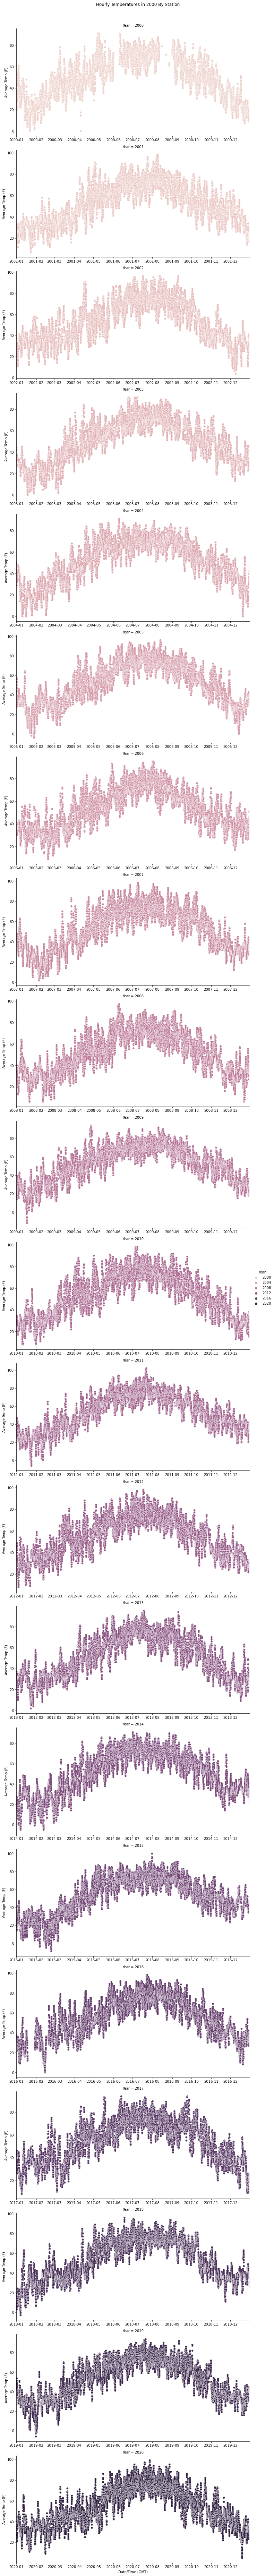

In [126]:
df_kipt_by_year = df_kipt.copy(deep=True)

df_kipt_by_year[year_col_name] = df_kipt_by_year.index.year
    
fg = sns.relplot(
    kind="scatter",
    data=df_kipt_by_year,
    x=df_kipt_by_year.index,
    y=ave_tmp_col_name,
    hue=year_col_name,
    row=year_col_name,
    aspect=2,
    facet_kws={'sharex': False, 
               'sharey': False}
)

fg.fig.suptitle(plot_title)
fg.fig.subplots_adjust(top=0.97) # scale down top of graph to 
                                 # allow plot title to fit
    
for ax in fg.axes:
    year = [int (i) 
            for i in ax[0].title.get_text().split() 
            if i.isdigit()][0]
    ax[0].set_xlim([
        pd.to_datetime(str(year) + "/1/1"), 
        pd.to_datetime(str(year) + "/12/31")
    ])

In [127]:
srs_kipt_ave_tmp = df_kipt_by_year[ave_tmp_col_name].copy(deep=True)
srs_kipt_ave_tmp[(srs_kipt_ave_tmp.index.year==2000) & \
                 (srs_kipt_ave_tmp.index.month==4)].nsmallest(5)

Date/Time (GMT)
2000-04-10 15:00:00+00:00     0.000000
2000-04-10 13:00:00+00:00    14.000000
2000-04-10 14:00:00+00:00    14.670000
2000-04-10 17:00:00+00:00    17.270000
2000-04-10 19:00:00+00:00    17.299999
Name: Average Temp (F), dtype: float32

After visually inspecting the graphs, similar to what was done for KUNV, the above temperatures from 4/10/2000 at KIPT appear to be particular anamolies/extreme deviations from normal. There are additional points of concern, which will be explored in problem 20 through z scores of adjacent delta average temperatures.

#### 20) [P] Compute a new Series that represents a running delta temperature between adjacent average temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think characterizes this distribution best. (HINT: It's a series of observations over a single numeric variable. What type of plot can reveal the distribution of these data?)

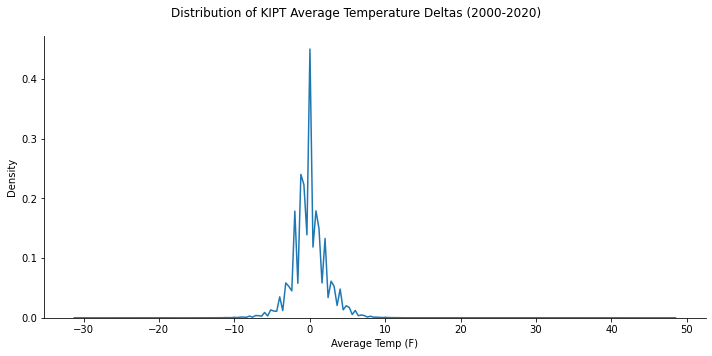

In [128]:
# already done in problem 19
# srs_kipt_ave_tmp = df_kipt[ave_tmp_col_name].copy(deep=True)
    
srs_kipt_ave_tmp_deltas = srs_kipt_ave_tmp.diff(periods=1)
    
srs_kipt_ave_tmp_deltas = srs_kipt_ave_tmp_deltas[
    srs_kipt_ave_tmp_deltas.notnull()
].sort_values().copy(deep=True)
srs_kipt_ave_tmp_deltas.rename(
    "Average Temperature Deltas (F)"
)
    
srs_kipt_ave_tmp_deltas_z_scores = get_srs_to_z_scores(
    srs=srs_kipt_ave_tmp_deltas,
    srs_mean=srs_kipt_ave_tmp_deltas.mean(),
    srs_std=srs_kipt_ave_tmp_deltas.std()
).sort_values().copy(deep=True)
srs_kipt_ave_tmp_deltas.rename(
    "Average Temperature Delta Z Scores"
)

srs_kipt_ave_tmp_std = srs_kipt_ave_tmp_deltas.std()

# change in average temperature across years at KIPT
# station are distributed normally
fg = sns.displot(kind="kde",
                 data=srs_kipt_ave_tmp_deltas, 
                 aspect=2);
fg.fig.subplots_adjust(top=0.9)
fg.fig.suptitle("Distribution of KIPT Average Temperature Deltas " + \
            "(2000-2020)");

A KDE plot allows us to plot the distribution of a numeric variable, providing information about the shape and curvature of the distribution.

In [129]:
# parameters, approximated z scores for normal dist

# quartile z score + 3 * IQR (three times for outer fences)
# mild vs. extreme outliers:
# https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
# extreme outliers is what will be identified as anomalies

# .67 = Q1/Q3 z score for normal dist
# 1.34 = IQR z score for normal dist
# source: http://www.cs.uni.edu/~campbell/stat/normfact.html#quart
z_score_threshold = .67 + 3 * 1.34

In [130]:
print("Z Scores for Adjacent Delta Average Temperatures " + \
      "for KIPT 2000-2020 (sorted):")
display(srs_kipt_ave_tmp_deltas_z_scores)

print("\nStandard deviation of KIPT ave tmp data set:\n" + \
      str(srs_kipt_ave_tmp_deltas.std()))

try:
    print("\nHere are the number of values beyond " + \
          str(z_score_threshold) + \
          " standard deviations: ")
    print(
        (
            abs(srs_kipt_ave_tmp_deltas_z_scores) > \
            z_score_threshold
        )
        .value_counts()[True]
    )
    
except:
    print(0)   
    
print("\n\nAverage Temperatures for KIPT 2000-2020 (sorted by" + \
      " adjacent delta average temperature z scores):")
srs_kipt_ave_tmp[srs_kipt_ave_tmp_deltas_z_scores.index]

Z Scores for Adjacent Delta Average Temperatures for KIPT 2000-2020 (sorted):


Date/Time (GMT)
2000-04-10 17:00:00+00:00   -13.617913
2000-04-10 13:00:00+00:00   -11.514755
2000-05-01 14:00:00+00:00    -9.691721
2012-07-07 20:00:00+00:00    -8.922490
2016-08-08 10:00:00+00:00    -8.891365
                               ...    
2000-06-24 20:00:00+00:00     9.783611
2000-06-10 17:00:00+00:00    12.006823
2000-05-01 15:00:00+00:00    13.398553
2000-04-10 20:00:00+00:00    15.875211
2000-04-10 16:00:00+00:00    21.299847
Name: Average Temp (F), Length: 180803, dtype: float32


Standard deviation of KIPT ave tmp data set:
2.2489989

Here are the number of values beyond 4.69 standard deviations: 
284


Average Temperatures for KIPT 2000-2020 (sorted by adjacent delta average temperature z scores):


Date/Time (GMT)
2000-04-10 17:00:00+00:00    17.270000
2000-04-10 13:00:00+00:00    14.000000
2000-05-01 14:00:00+00:00    28.500000
2012-07-07 20:00:00+00:00    76.029999
2016-08-08 10:00:00+00:00    60.099998
                               ...    
2000-06-24 20:00:00+00:00    81.000000
2000-06-10 17:00:00+00:00    89.099998
2000-05-01 15:00:00+00:00    58.630001
2000-04-10 20:00:00+00:00    53.000000
2000-04-10 16:00:00+00:00    47.900002
Name: Average Temp (F), Length: 180803, dtype: float32

We can see adjacent temperature deltas (adjacent hours with at least one value as NAN are skipped over), i.e. extreme changes in adjacent temperatures -- from one hour to the next, that are extreme outliers, which, for a normal distribution, is generally a z score of 4.68 or higher.

#### 21) [P] Perhaps it's more important to select the station that has the most similar values. Write a function called ```compare_station``` that takes two Series objects of numeric data, and computes the sum of the absolute value of the difference between each pair of numbers in both ```Series```. You should only sum the values that have valid values for both entries. Return the average of these absolute differences.<br/><br/>Then, call ```compare_station``` on KIPT and each of the other station, but pass only the average temp vector from each station using your ```df_ave_temps```.

# why do we need to sum when we have a mean function?
# is there an easier way than reindex

In [131]:
def compare_station(s1: pd.Series,
                    s2: pd.Series):
    if (pd.api.types.is_numeric_dtype(s1.dtype) \
        and pd.api.types.is_numeric_dtype(s2.dtype) == False):
        raise Exception(
            "compare_station(pd.Series, pd.Series) only takes " + \
            "two Series objects of numeric data."
        )
    
    # "Using .loc or [] with a list with one or more 
    # missing labels will no longer reindex, in favor of .reindex."
    # but... it mentions .isin(), which may be a better option...
    # source: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike%22
    
    return abs(s1.reindex(s2.index).dropna() - \
               s2.reindex(s1.index).dropna()).mean()

In [132]:
for col_name in df_ave_temps.columns:
    if col_name != "KIPT":
        print("KIPT and " + col_name + ":")
        print(compare_station(
            df_ave_temps["KIPT"], 
            df_ave_temps[col_name]))
        print()

KIPT and KSEG:
2.0660634

KIPT and KUNV:
3.000127

KIPT and KCXY:
3.78025



#### 22) [P] As we learned in class, you could compute a *correlation coefficient* between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite.

In [133]:
df_ave_temps.dropna().corr()

KIPT      KSEG      KUNV      KCXY
KIPT  1.000000  0.988232  0.981036  0.980839
KSEG  0.988232  1.000000  0.973735  0.982442
KUNV  0.981036  0.973735  1.000000  0.976780
KCXY  0.980839  0.982442  0.976780  1.000000

#### 23) [M] Interpret what you have observed so far. Which station is most similar? How would this affect your approach to cleaning your data? Are there other things you might do to clean your data?

# check on this with prof king

KSEG appears to be most similar to KIPT, having the highest correlation coefficient with KIPT. With regards to additional approaches to clean the data, I may want to fill in missing KIPT average temperatures with nearby stations. Perhaps I could fill in missing KIPT average temperatures with KSEG average temperatures. If KSEG does not have a particular average temperature recorded for a particular hour, then try to use KCXY's average temperature at that hour (if still not, use KUNV's, and if still not, then perhaps omit it or estimate based on local points). If average temperatures from multiple other stations are available for a particular hour for which KIPT does not have a recorded average temperature, then perhaps some sort of averaging could take place amongst those multiple values to estimate the average temperature of KIPT at that hour; moreover, weightage could be applied to each of the other average temperatures during averaging based upon geographic closeness/correlation coefficients between values KIPT and those at  other stations, respectively.

#### 24) [P] Create a new attribute called ```KIPT_GOOD``` in your ```df_ave_temps``` data frame that keeps all of the original average temp data, but takes the readings from the closest station with available data to replace in the NA values. Be sure to replace the data from the best representative first, then the second best. Ignore the third. When you perform data cleaning, NEVER DELETE YOUR ORIGINAL DATA! Either store it, or just create a separate attribute of cleaned data, or create a separate data frame. Be sure to print out what you are doing as your cell executes. Be sure to include a before and after report to indicate how many values you fixed. For example:<br/><br/>&emsp;&emsp;*output in assignment matches output below*

In [134]:
df_ave_temps["KIPT_GOOD"] = df_ave_temps["KIPT"].copy(deep=True)

num_nan_in_kipt = df_ave_temps["KIPT_GOOD"].isna().sum()

print("Starting with " + str(num_nan_in_kipt) + \
      " missing values in KIPT")


srs_kseg_to_kipt = \
df_ave_temps["KSEG"]\
[df_ave_temps["KIPT_GOOD"].isna()].copy(deep=True).dropna()

num_copy_from_kseg = \
len(srs_kseg_to_kipt.index)

print("Copying " + str(num_copy_from_kseg) + " values from KSEG")

df_ave_temps["KIPT_GOOD"][srs_kseg_to_kipt.index] = \
srs_kseg_to_kipt


srs_kunv_to_kipt = \
df_ave_temps["KUNV"]\
[df_ave_temps["KIPT_GOOD"].isna()].copy(deep=True).dropna()

num_copy_from_kunv = \
len(srs_kunv_to_kipt.index)

print("Next, copying " + str(num_copy_from_kunv) + \
      " values from KUNV")

df_ave_temps["KIPT_GOOD"]\
[srs_kunv_to_kipt.index] = srs_kunv_to_kipt


num_nan_left_kipt = \
len(df_ave_temps["KIPT_GOOD"]\
    [df_ave_temps["KIPT_GOOD"].isnull()].index)

print("We still have " + str(num_nan_left_kipt) + \
      " missing values in KIPT")

Starting with 3166 missing values in KIPT
Copying 1564 values from KSEG
Next, copying 343 values from KUNV
We still have 1259 missing values in KIPT


#### 25) [P] We want to consider setting singleton missing observations, i.e. those missing values that are surrounded by two good observations, as candidates to fill in with the average of their surrounding values. Before we do that, report the number of missing values left in ```KIPT_GOOD``` that are singleton missing values.

In [135]:
kipt_good_index = df_ave_temps["KIPT_GOOD"].index
df_ave_temps["KIPT_GOOD"].index.reindex(df_ave_temps.index)

KIPT_GOOD_singleton_vals = df_ave_temps["KIPT_GOOD"][
    df_ave_temps["KIPT_GOOD"].isna() & \
    df_ave_temps["KIPT_GOOD"].shift(1).notna() & \
    df_ave_temps["KIPT_GOOD"].shift(-1).notna()
]

print("Number of missing values left in KIPT_GOOD " + \
      "that are singleton missing values: " + \
      str(len(KIPT_GOOD_singleton_vals.index)))

Number of missing values left in KIPT_GOOD that are singleton missing values: 161


#### 26) [P] Now, convert all singletons missing values in ```KIPT_GOOD``` to an average of the surrounding observations. For example ```[..., 2, NaN, 5, ...]``` would be filled in with ```(2+5)/2 = 3.5``` for the NaN value. Then, report the number of values that are still missing in ```KIPT_GOOD```.

In [136]:
df_ave_temps["KIPT_GOOD"][KIPT_GOOD_singleton_vals.index] = \
(df_ave_temps["KIPT_GOOD"].shift(1) \
 [KIPT_GOOD_singleton_vals.index] + # hour before \
df_ave_temps["KIPT_GOOD"].shift(-1) \
 [KIPT_GOOD_singleton_vals.index])/2 # hour after

print("Number of values that are still missing in KIPT_GOOD: " + \
      str(df_ave_temps["KIPT_GOOD"].isna().sum()))

Number of values that are still missing in KIPT_GOOD: 1098


#### 27) [P] Eliminate that first year of data from ```df_ave_temps```. There are too many missing values in these data to make it worthwhile.

In [137]:
# parameter (try/except entered to avoid reassignment)
try: first_year
except: first_year = df_ave_temps.index.year.unique()[0]

In [138]:
df_ave_temps = df_ave_temps[df_ave_temps.index.year!=first_year]

In [139]:
display(df_ave_temps) # verify that 2000 temps are removed

KIPT       KSEG       KUNV       KCXY  \
2001-01-01 00:00:00+00:00  21.000000  19.000000  15.800000  23.000000   
2001-01-01 01:00:00+00:00  19.900000  19.000000  14.000000  21.900000   
2001-01-01 02:00:00+00:00  19.000000  17.100000  15.800000  21.000000   
2001-01-01 03:00:00+00:00  19.000000  14.000000  15.800000  19.000000   
2001-01-01 04:00:00+00:00  19.000000  14.000000  15.800000  18.000000   
...                              ...        ...        ...        ...   
2020-12-31 19:00:00+00:00  37.599998  39.000000  33.799999  41.000000   
2020-12-31 20:00:00+00:00  37.000000  37.900002  33.799999  41.000000   
2020-12-31 21:00:00+00:00  36.000000  37.000000  33.799999  41.000000   
2020-12-31 22:00:00+00:00  34.000000  36.000000  33.799999  41.000000   
2020-12-31 23:00:00+00:00  30.000000  36.000000  32.000000  39.900002   

                           KIPT_GOOD  
2001-01-01 00:00:00+00:00  21.000000  
2001-01-01 01:00:00+00:00  19.900000  
2001-01-01 02:00:00+00:00  19.000000  
2001-01-01 03:00:00+00:00  19.000000  
2001-01-01 04:00:00+00:00  19.000000  
...                              ...  
2020-12-31 19:00:00+00:00  37.599998  
2020-12-31 20:00:00+00:00  37.000000  
2020-12-31 21:00:00+00:00  36.000000  
2020-12-31 22:00:00+00:00  34.000000  
2020-12-31 23:00:00+00:00  30.000000  

[175320 rows x 5 columns]

#### 28) [P] Generate an updated barplot of the total number of missing values in ```df_ave_temps.KIPT_GOOD``` by year.<br/><br/>Your result should look something like this:<br/><br/>&emsp;&emsp;*output in assignment matches output below*

In [140]:
kipt_good_nan_by_year = \
df_ave_temps.KIPT_GOOD[
    df_ave_temps.KIPT_GOOD.isna()
].index.year.value_counts()

kipt_good_nan_by_year = \
kipt_good_nan_by_year.reindex(
    df_ave_temps.KIPT_GOOD.index.year.unique(),
    fill_value=0)

display(kipt_good_nan_by_year) # verifying output

2001    11
2002     0
2003    11
2004     2
2005     5
2006     3
2007    30
2008    90
2009    15
2010     6
2011    10
2012    18
2013    21
2014     5
2015    20
2016     6
2017    52
2018    35
2019    15
2020    12
dtype: int64

In [141]:
# plotting parameters
title = "Number of missing observations for KIPT after repair"
x_label = "year"
y_label = "Count of missing observations"

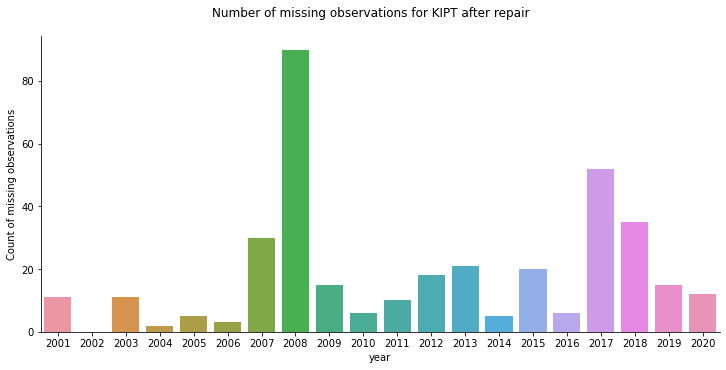

In [142]:
fg = sns.catplot(kind='bar',
                 data=pd.DataFrame({
                     "index": kipt_good_nan_by_year.index,
                     "value": kipt_good_nan_by_year
                 }),
                 x="index",
                 y="value",
                 aspect=2)
fg.fig.suptitle(title)
fg.fig.subplots_adjust(top=0.9)
fg.ax.set_xlabel(x_label)
fg.ax.set_ylabel(y_label);

#### 29) [P] Finally, create some good, clean line plots of ```KIPT_GOOD```. Create at least three plots using different averaging times. One should be the raw data. I would suggest creating another one by month, and then the final one by year. Be sure they are labeled.<br/><br/>On the graph that plots the yearly average temp, plot a trendline. For example:<br/><br/>&emsp;&emsp;*output below matches the one given in the assignment*

In [222]:
def _get_lin_reg_y_coords(x: pd.DatetimeIndex, y: pd.Series):
    x_coords = x.to_series().apply(
            lambda i: i.toordinal()
        )

    lin_reg_coefs = np.polyfit(
        x=x_coords,
        y=y,
        deg=1
    )
    m = lin_reg_coefs[0]
    b = lin_reg_coefs[1]
    
    return m*x_coords + b
        
    

def lineplot_with_ave(df: pd.DataFrame,
                      title: str,
                      trendline_on: bool,
                      ave_period: str=None,
                      x: pd.Index=None,
                      y: str="KIPT_GOOD",
                      lineplot_label: str="KIPT",
                      trendline_label: str="trendline",
                      top_adjust_factor: int=0.85,
                      x_label: str="date/time (GMT)",
                      y_label: str="deg (F)",
                      legend_on: bool=True,
                      aspect: float=2.0):
    df=df.copy(deep=True)
    if ave_period is not None:
        df=df.resample(ave_period).mean()
    if x is None: 
        x = df.index
    fg = sns.relplot(kind="line",
                     data=df,
                     x=x,
                     y=y,
                     label=lineplot_label,
                     aspect=aspect)
    if trendline_on is True: 
        sns.lineplot(
            data=df,
            x=df.index, 
            y=_get_lin_reg_y_coords(x,df[y]), 
            label=trendline_label,
            ax=fg.ax)
        fg.ax.lines[1].set_linestyle("--")
    fg.fig.suptitle(title)
    fg.fig.subplots_adjust(top=top_adjust_factor)
    fg.ax.set_xlabel(x_label)
    fg.ax.set_ylabel(y_label)
    if legend_on is True: fg.ax.legend()

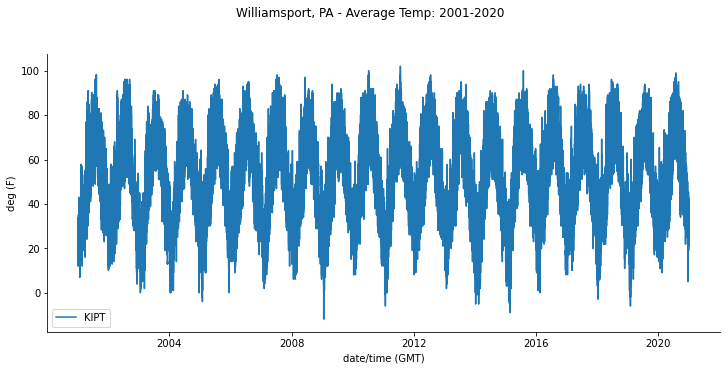

In [223]:
lineplot_with_ave(
    df=df_ave_temps,   
    title="Williamsport, PA - Average Temp: 2001-2020",
    trendline_on=False
)

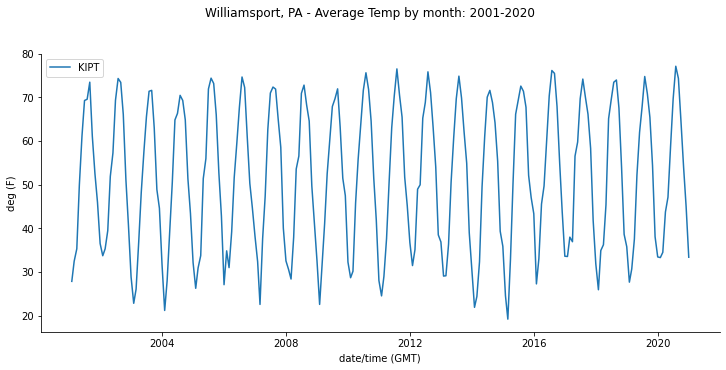

In [224]:
lineplot_with_ave(
    df=df_ave_temps,   
    title="Williamsport, PA - Average Temp by month: 2001-2020",
    trendline_on=False,
    ave_period="M"
)

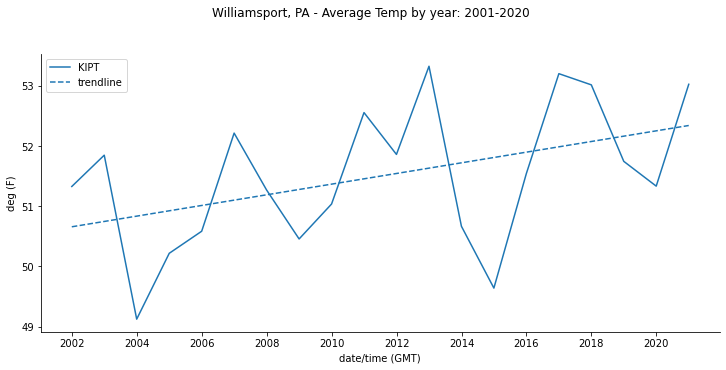

In [225]:
lineplot_with_ave(
    df=df_ave_temps,   
    title="Williamsport, PA - Average Temp by year: 2001-2020",
    trendline_on=True,
    ave_period="Y"
)